## Yahoo Finance

In [1]:
import yfinance as yf
import time
import pandas as pd
from bs4 import BeautifulSoup
import re
from selenium import webdriver
import chromedriver_binary
import string
import datetime
from forex_python.converter import CurrencyRates
pd.options.display.float_format = '{:.3f}'.format
import matplotlib.pyplot as plt

### Functions for screener results and getting data

In [16]:

def get_rate(from_currency, to_currency, dt):
    date_string = dt.split(" ")
    date_string[1] = date_string[1][:-1]
    date_string = date_string[1] + "-" + date_string[0] + "-" + date_string[2]
    curr_rates = CurrencyRates()
    return curr_rates.get_rate(from_currency.upper(), to_currency.upper(), datetime.datetime.strptime(date_string, "%d-%b-%Y"))


In [17]:
"""
function for scraping screener results which takes two parameters url and currency,
so that we can reuse it for different countries screener 
"""
def get_company_price_data(url, period = ""):
    driver = webdriver.Chrome()
    #driver.implicitly_wait(5)
    driver.get(url)
    try:
        driver.find_element_by_name("agree").click()
    except:
        print("no cookies pop up")
        
    #time.sleep(1)         #in case we need to make the program wait
    if period != "":
        driver.find_element_by_css_selector(".dateRangeBtn").click()
        period_selector = driver.find_element_by_xpath("//button[@data-value='{period}']".format(period = period))
        
        period_selector.click()
        driver.find_element_by_css_selector("#mrt-node-Col1-1-HistoricalDataTable button").click()
        
    last_height = driver.execute_script("return document.documentElement.scrollHeight")
    while True:
        driver.execute_script("window.scrollTo(0,document.documentElement.scrollHeight);")
        time.sleep(1) 
        new_height = driver.execute_script("return document.documentElement.scrollHeight")
        if new_height == last_height:
            break
        last_height = new_height 
        
    html = driver.execute_script('return document.body.innerHTML;')
    soup = BeautifulSoup(html,'html.parser')
    results = soup.find('table').find_all('tr')
    companies_results = []
    for tr in results:
        if len(tr.find_all("td")) >= 5:
            value = float(tr.find_all('td')[4].find('span').text)
            date = tr.find_all('td')[0].find('span').text
            companies_results.append({"date":date, "value_local":value})
            
    return companies_results

def filter_date(companies_results, data):
    companies_filtered = companies_results.copy()
    for dicti in companies_results:
        for dictj in data:
            if dicti["date"] == dictj["date"]:
                companies_filtered.remove(dicti)
        
    return companies_filtered
        
    
"""
Function for getting the currency values for all the dates required.
"""

def get_currency_price(from_currency, to_currency, companies_filtered):
    
    data = []
    
    for obj in companies_filtered:
        try:
            rate = get_rate(from_currency, to_currency, obj["date"])
            data.append({'date': obj["date"], 'currency_rate': rate})
        except:
            print("error")
    return data



In [6]:
akbnk = get_company_price_data("https://finance.yahoo.com/quote/AKBNK.IS/history?p=AKBNK.IS", period = "6_M")

akbnk

[{'date': 'Jan 26, 2022', 'value_local': 7.7},
 {'date': 'Jan 25, 2022', 'value_local': 7.7},
 {'date': 'Jan 24, 2022', 'value_local': 7.58},
 {'date': 'Jan 21, 2022', 'value_local': 7.92},
 {'date': 'Jan 20, 2022', 'value_local': 7.84},
 {'date': 'Jan 19, 2022', 'value_local': 7.88},
 {'date': 'Jan 18, 2022', 'value_local': 7.41},
 {'date': 'Jan 17, 2022', 'value_local': 7.75},
 {'date': 'Jan 14, 2022', 'value_local': 7.51},
 {'date': 'Jan 13, 2022', 'value_local': 7.56},
 {'date': 'Jan 12, 2022', 'value_local': 7.63},
 {'date': 'Jan 11, 2022', 'value_local': 7.61},
 {'date': 'Jan 10, 2022', 'value_local': 7.58},
 {'date': 'Jan 07, 2022', 'value_local': 7.62},
 {'date': 'Jan 06, 2022', 'value_local': 7.32},
 {'date': 'Jan 05, 2022', 'value_local': 7.34},
 {'date': 'Jan 04, 2022', 'value_local': 7.27},
 {'date': 'Jan 03, 2022', 'value_local': 7.33},
 {'date': 'Dec 31, 2021', 'value_local': 7.2},
 {'date': 'Dec 30, 2021', 'value_local': 7.34},
 {'date': 'Dec 29, 2021', 'value_local': 7.

In [7]:
len(akbnk)

130

In [8]:

turkishLira = get_currency_price("USD", "TRY", akbnk)

print(turkishLira)

len(turkishLira)

[{'date': 'Jan 26, 2022', 'currency_rate': 13.556530992285182}, {'date': 'Jan 25, 2022', 'currency_rate': 13.553691870784522}, {'date': 'Jan 24, 2022', 'currency_rate': 13.413039631988676}, {'date': 'Jan 21, 2022', 'currency_rate': 13.414698625308425}, {'date': 'Jan 20, 2022', 'currency_rate': 13.414535191391781}, {'date': 'Jan 19, 2022', 'currency_rate': 13.592507712648743}, {'date': 'Jan 18, 2022', 'currency_rate': 13.587314155010116}, {'date': 'Jan 17, 2022', 'currency_rate': 13.396211523283347}, {'date': 'Jan 14, 2022', 'currency_rate': 13.563029614746222}, {'date': 'Jan 13, 2022', 'currency_rate': 13.586670156154584}, {'date': 'Jan 12, 2022', 'currency_rate': 13.713456464379947}, {'date': 'Jan 11, 2022', 'currency_rate': 13.846153846153847}, {'date': 'Jan 10, 2022', 'currency_rate': 13.887877716911115}, {'date': 'Jan 07, 2022', 'currency_rate': 13.914498141263941}, {'date': 'Jan 06, 2022', 'currency_rate': 13.743172779496245}, {'date': 'Jan 05, 2022', 'currency_rate': 13.468150896

130

In [9]:
turkishLira_df = pd.DataFrame(data = turkishLira)

turkishLira_df = turkishLira_df.reindex(index = turkishLira_df.index[::-1])

turkishLira_df = turkishLira_df.reset_index(drop = True)

turkishLira_df.dtypes



date              object
currency_rate    float64
dtype: object

In [10]:
turkishLira_df

,date,currency_rate
0,"Jul 27, 2021",8.558
1,"Jul 28, 2021",8.552
2,"Jul 29, 2021",8.494
3,"Jul 30, 2021",8.408
4,"Aug 02, 2021",8.344
...,...,...
125,"Jan 20, 2022",13.415
126,"Jan 21, 2022",13.415
127,"Jan 24, 2022",13.413
128,"Jan 25, 2022",13.554


In [11]:
akbnk_df = pd.DataFrame(data = akbnk)

akbnk_df = akbnk_df.reindex(index = akbnk_df.index[::-1])

akbnk_df = akbnk_df.reset_index(drop = True)

akbnk_df.dtypes


date            object
value_local    float64
dtype: object

In [12]:
akbnk_df.tail(15)

,date,value_local
115,"Jan 06, 2022",7.320
116,"Jan 07, 2022",7.620
117,"Jan 10, 2022",7.580
118,"Jan 11, 2022",7.610
119,"Jan 12, 2022",7.630
120,"Jan 13, 2022",7.560
121,"Jan 14, 2022",7.510
122,"Jan 17, 2022",7.750
123,"Jan 18, 2022",7.410
124,"Jan 19, 2022",7.880


In [13]:
merged_df = pd.merge(turkishLira_df, akbnk_df, how = "inner", on = ["date"])
merged_df["value_usd"] = merged_df["value_local"] / merged_df["currency_rate"]
merged_df

,date,currency_rate,value_local,value_usd
0,"Jul 27, 2021",8.558,5.140,0.601
1,"Jul 28, 2021",8.552,5.100,0.596
2,"Jul 29, 2021",8.494,5.210,0.613
3,"Jul 30, 2021",8.408,5.260,0.626
4,"Aug 02, 2021",8.344,5.300,0.635
...,...,...,...,...
125,"Jan 20, 2022",13.415,7.840,0.584
126,"Jan 21, 2022",13.415,7.920,0.590
127,"Jan 24, 2022",13.413,7.580,0.565
128,"Jan 25, 2022",13.554,7.700,0.568


## Plot

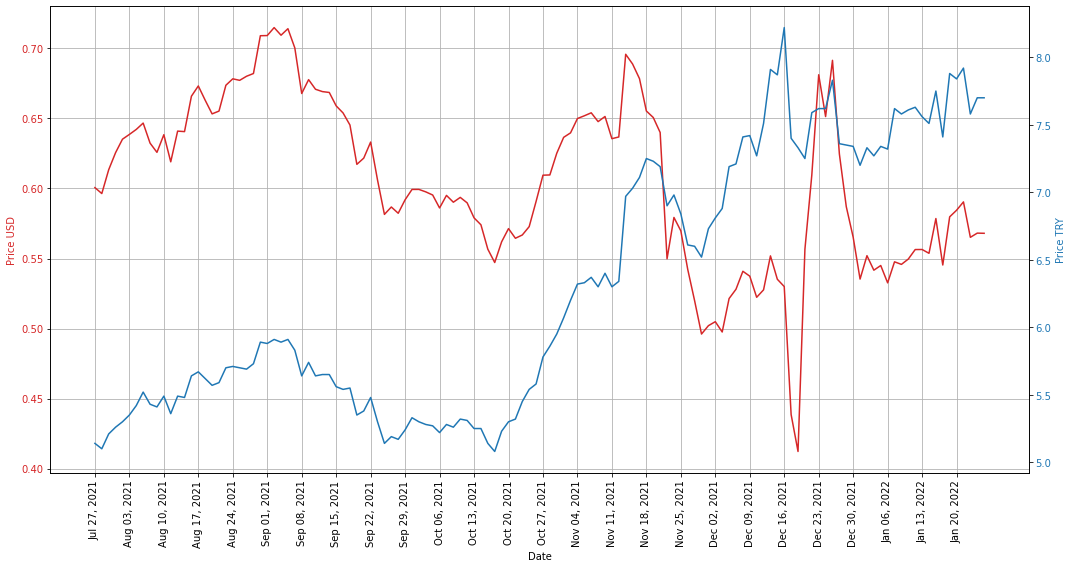

In [15]:
# set figure, size and xtick rotation before setting axis
fig, ax1 = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(15)
plt.xticks(rotation=90)

# first axis for the first plot
color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price USD', color=color)
ax1.plot(merged_df['date'], merged_df['value_usd'], color = color)
ax1.tick_params(axis='y', labelcolor=color)

# second axis for the second plot
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
color = 'tab:blue'
ax2.set_ylabel('Price TRY', color=color)  # we already handled the x-label with ax1
ax2.plot(merged_df['date'], merged_df['value_local'], color = color)
ax2.tick_params(axis='y', labelcolor=color)

# set X ticks frequency for both plot x axis
if len(merged_df['date']) < 500:
    x_ticks_frequency = merged_df['date'][::5]
    ax1.set_xticks(x_ticks_frequency)
    ax2.set_xticks(x_ticks_frequency)
    
if len(merged_df['date']) > 500:
    x_ticks_frequency = merged_df['date'][::25]
    ax1.set_xticks(x_ticks_frequency)
    ax2.set_xticks(x_ticks_frequency)

# show plot
fig.tight_layout()  # otherwise the right y-label is slightly clipped
ax1.grid(which = "both", axis = "both")
#ax2.grid(which = "both", axis = "both")
plt.show()